# Euler-Maruyama Method

In Itô calculus, the [Euler–Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) is a method for the **approximate numerical solution of a stochastic differential equation (SDE)**. 

Consider the stochastic differential equation,

$$
d X_t = a (X_t) dt + b (X_t) W_t
$$

with initial condition $X_0 = x_0$, where $W_t$ stands for the **Wiener process**, and suppose that we wish to solve this SDE on some interval of time $[0, T]$. Then the Euler–Maruyama approximation to the **true solution** $X$ is the Markov chain $Y$ defined as follows:

1. **Partition the interval** $[0, T]$ into $N$ equal subintervals of width $\Delta t = T/N$, $\{ 0=\tau_0, \tau_1, \cdots, \tau_N = T \}$

2. **Set** $Y0 = x0$

3. **Recursively define** $Y_n$ for $1 \le n \le N$ by

$$
Y_{n+1} = Y_n + a(Y_n) \Delta t + b(Y_n) \Delta W_n
$$

where $\Delta W_n := W_{\tau_{n+1}} - W_{\tau_n}$. 

### Wiener process

We have $\Delta W_n \overset{iid}{\sim} Normal(0, \Delta t)$, since $\{W\}$ : is a **Wiener process**. A **Wiener process** is characterized by the following properties:

+ $W_0 = 0$

+ $W$ has **independent increments**, i.e. $W_{t+u} - W_t \perp W_s$, where $u \ge 0, s < t, \forall t>0$

+ $W$ has **Gaussian increments**, i.e. $W_{t+u} - W_t \sim Normal(0, u)$ where the **lag** $u \ge 0$

+ $W$ has **continuous paths**, i.e. for almost every **realization** $\omega$, $t \mapsto W(\omega)(t)$ is continuous

### Example : Ornstein-Uhlenbeck Process

[Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process) is a **stochastic process** whose original purpose was modeling the velocity of a massive Brownian particle under the influence of friction.

The process is a **stationary Gauss–Markov process**, which is **the only process** that satisfies the following three conditions, up to allowing linear transformations of the space and time variables.

+ Gaussian process
+ Markov process
+ Temporally homogeneous

Over time, the process tends to drift towards its long-term mean: such a process is called **mean-reverting**.

The process can be considered to be a modification of the random walk in continuous time, or **Wiener process**, in which the properties of the process have been changed so that there is a **tendency of the walk to move back towards a central location, with a greater attraction when the process is further away from the center**. The Ornstein–Uhlenbeck process can also be considered as the continuous-time analogue of the **discrete-time AR(1) process**.

$$
\begin{aligned}
dY_t&= \theta \cdot (\mu -Y_t) dt + \sigma dW_t \\[8pt]
Y_0&=Y_{\mathrm{init}}
\end{aligned}
$$


**Note that here we have**

$$
\begin{aligned}
a(Y_t) &= \theta \cdot (\mu - Y_t) \\[8pt]
b(Y_t) &= \sigma
\end{aligned}
$$

### Implementation: R

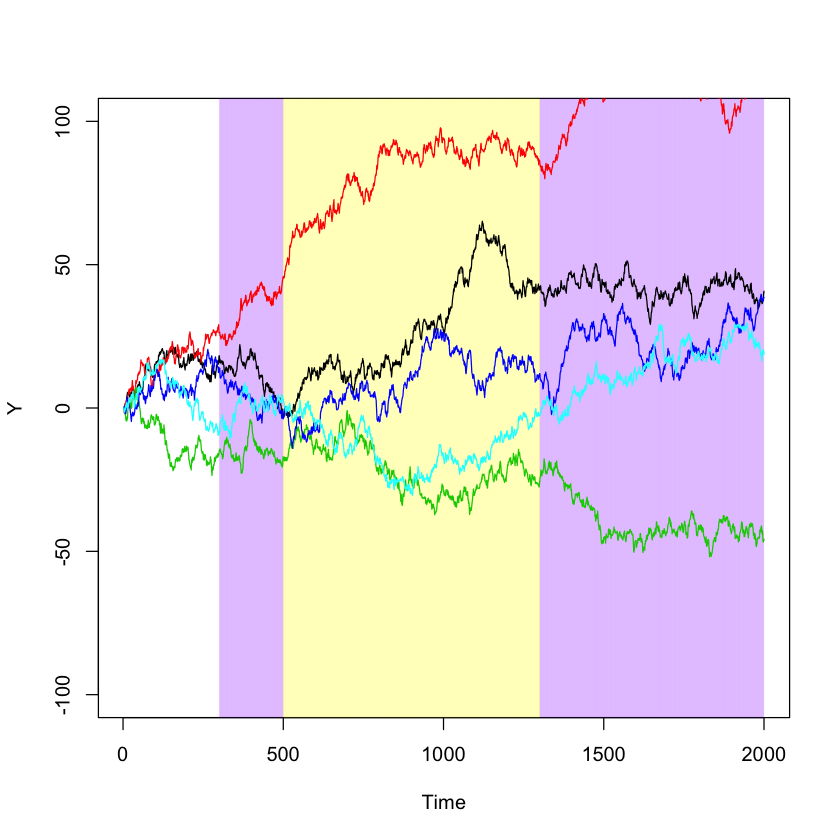

In [36]:
## Model parameters
d = 0.002
r_left  = 2
r_right = 2
theta   = 0.5
sigma   = 0.02

## Simulation parameters
num_sim = 5    ### display five runs
t_init  = 3    ### initial time
t_end   = 2000    ### ending time
N       = 2*1e3 ### 1000 grid points
delta_t = (t_end - t_init) / N  ### discretized time
y_init  = 0    ### Y_0

## Simulation variables
ts    = seq(t_init, t_end, by=delta_t) ## series of time t
ys    = vector(length=N)               ## series of Y (initialized)
ys[1] = y_init                         ## initialize Y0

## Function definitions

current_state = function(t) {
    if ((t>300 & t<500) | (t>1300) ){
        return ("l")
    } else if (t>=500 & t<=1300) {
        return ("r")
    } else{
        return ("none")
    }
}

a  = function(t){
    if (current_state(t) == "l"){
        return(d * (r_left- theta*r_right)) 
    } else if (current_state(t) == "r") {
        return(d * (theta*r_left- r_right))
    } else{
        return(0)
    }

}
b  = function(y_n){ return(1) } ## not depend on y_n 
dW = function(dt){ return(rnorm(1,mean=0,sd=sqrt(dt))) }


library(scales)

plot(NULL, type="n", xlab="Time", ylab="Y", xlim=c(t_init, t_end), ylim=c(-100, 100)) ## NULL plot
abline(v = c(seq(300,500,by=0.1)) , col=alpha("purple",0.01))
abline(v = c(seq(1300,2000,by=0.1)) , col=alpha("purple",0.01))
abline(v = c(seq(500,1300,by=0.1)) , col=alpha("yellow",0.01))

for (iter in 1:num_sim){
    for (i in 2:length(ts)){
        t     = (i-1)*delta_t ## increment of time by dt
        y     = ys[i-1]       ## current y
        ys[i] = y + a(t) * delta_t + dW(delta_t) ## generate next observation
    }
    lines(ts, ys, col=iter)
}



In [33]:
## Model parameters
theta   = 0.1
mu      = 1.5  
sigma   = 0.06

In [34]:
## Simulation parameters
num_sim = 5    ### display five runs
t_init  = 3    ### initial time
t_end   = 7    ### ending time
N       = 1000 ### 1000 grid points
delta_t = (t_end - t_init) / N  ### discretized time
y_init  = 0    ### Y_0

In [35]:
## Simulation variables
ts    = seq(t_init, t_end, by=delta_t) ## series of time t
ys    = vector(length=N)               ## series of Y (initialized)
ys[1] = y_init                         ## initialize Y0

In [36]:
## Function definitions

### Deterministic
a  = function(y_n){ return(theta * (mu - y_n)) }
b  = function(y_n){ return(sigma) } ## not depend on y_n 

### Stochastic
dW = function(dt){ return(rnorm(1,mean=0,sd=sqrt(dt))) }

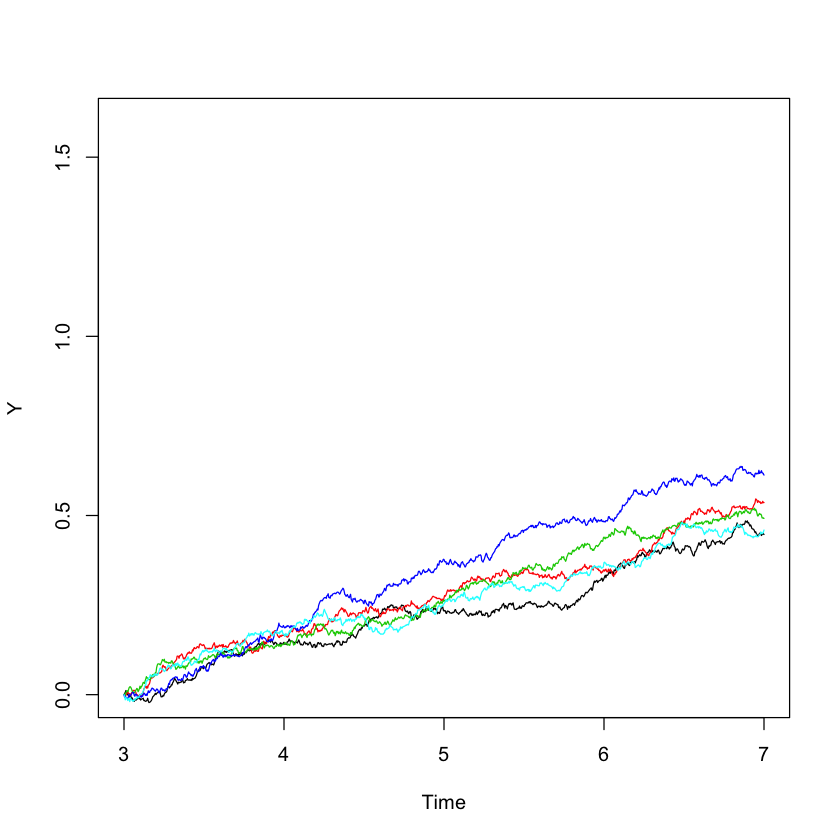

In [38]:
## Simultation
plot(NULL, type="n", xlab="Time", ylab="Y", xlim=c(t_init, t_end), ylim=c(0, mu+.1)) ## NULL plot

for (iter in 1:num_sim){
    for (i in 2:length(ts)){
        t     = (i-1)*delta_t ## increment of time by dt
        y     = ys[i-1]       ## current y
        ys[i] = y + a(y) * delta_t + b(y) * dW(delta_t) ## generate next observation
    }
    lines(ts, ys, col=iter)
}